In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

TensorFlow 2.x selected.


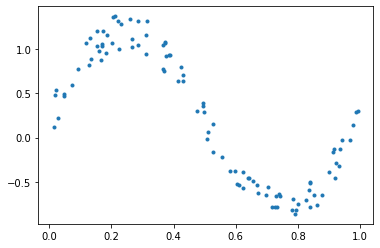

In [ ]:
N = 100
X = np.random.rand(N, 1)
Y = np.sin(2 * np.pi * X) + 0.4 * np.random.rand(N, 1)
plt.plot(X, Y, '.')
plt.show()

In [ ]:
# 1-100-100-1
inputs = keras.Input(shape=(1,))
d1 = layers.Dense(100, activation='relu')
d2 = layers.Dense(100, activation='relu')
d3 = layers.Dense(1)
outputs = d3(d2(d1(inputs)))
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

In [ ]:
class NLRegressor(keras.Model):
  def __init__(self):
    super(NLRegressor, self).__init__()
    self.d1 = layers.Dense(100, activation='relu')
    self.d2 = layers.Dense(100, activation='relu')
    self.d3 = layers.Dense(1)
  def call(self, inputs):
    x = self.d1(inputs)
    x = self.d2(x)
    return self.d3(x)

In [ ]:
model = NLRegressor()
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

In [ ]:
model.fit(X, Y, epochs=500)

Train on 100 samples
Epoch 1/500
100/100 [==============================] - 1s 14ms/sample - loss: 0.5435
Epoch 2/500
100/100 [==============================] - 0s 131us/sample - loss: 0.4799
Epoch 3/500
100/100 [==============================] - 0s 110us/sample - loss: 0.4406
Epoch 4/500
100/100 [==============================] - 0s 120us/sample - loss: 0.3791
Epoch 5/500
100/100 [==============================] - 0s 150us/sample - loss: 0.3313
Epoch 6/500
100/100 [==============================] - 0s 111us/sample - loss: 0.2762
Epoch 7/500
100/100 [==============================] - 0s 131us/sample - loss: 0.2910
Epoch 8/500
100/100 [==============================] - 0s 137us/sample - loss: 0.1957
Epoch 9/500
100/100 [==============================] - 0s 113us/sample - loss: 0.1761
Epoch 10/500
100/100 [==============================] - 0s 131us/sample - loss: 0.2685
Epoch 11/500
100/100 [==============================] - 0s 117us/sample - loss: 0.1923
Epoch 12/500
100/100 [==========

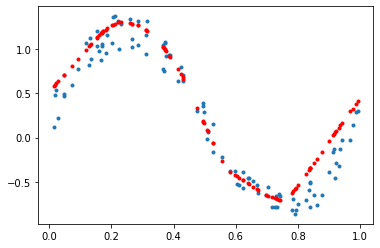

In [ ]:
Z = model.predict(X)
plt.plot(X, Y, '.')
plt.plot(X, Z, '.r')
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
itrain = []
itest = []
X = df.iloc[:, :4].values
L = df.iloc[:, -1].values
classes = np.unique(L)
split = 0.5
Y = []
for c in classes:
  Idx = L == c
  idx = np.where(Idx)[0]
  sp = int(split * len(idx))
  itrain.extend(idx[:sp])
  itest.extend(idx[sp:])
  Y.append(Idx.astype(np.int)) # one-hot
Y = np.array(Y).T

In [ ]:
# 4-100-100-3
inputs = keras.Input(shape=(4,))
d1 = layers.Dense(100, activation='relu')
d2 = layers.Dense(100, activation='relu')
d3 = layers.Dense(3)
outputs = d3(d2(d1(inputs)))
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

In [ ]:
class Classifier(keras.Model):
  def __init__(self):
    super(Classifier, self).__init__()
    self.d1 = layers.Dense(100, activation='relu')
    self.d2 = layers.Dense(100, activation='relu')
    self.d3 = layers.Dense(3)
  def call(self, inputs):
    x = self.d1(inputs)
    x = self.d2(x)
    return self.d3(x)

In [ ]:
model = Classifier()
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

In [ ]:
model.fit(X[itrain], Y[itrain], epochs=500)

Train on 75 samples
Epoch 1/500
75/75 [==============================] - 0s 3ms/sample - loss: 6.0074
Epoch 2/500
75/75 [==============================] - 0s 158us/sample - loss: 0.2367
Epoch 3/500
75/75 [==============================] - 0s 150us/sample - loss: 0.1571
Epoch 4/500
75/75 [==============================] - 0s 144us/sample - loss: 0.1262
Epoch 5/500
75/75 [==============================] - 0s 155us/sample - loss: 0.1168
Epoch 6/500
75/75 [==============================] - 0s 142us/sample - loss: 0.1092
Epoch 7/500
75/75 [==============================] - 0s 116us/sample - loss: 0.1100
Epoch 8/500
75/75 [==============================] - 0s 124us/sample - loss: 0.1103
Epoch 9/500
75/75 [==============================] - 0s 130us/sample - loss: 0.1206
Epoch 10/500
75/75 [==============================] - 0s 146us/sample - loss: 0.1101
Epoch 11/500
75/75 [==============================] - 0s 132us/sample - loss: 0.1035
Epoch 12/500
75/75 [==============================] - 0s

In [ ]:
Z = model.predict(X[itest])

In [ ]:
np.sum(tf.argmax(Z, axis=1) == tf.argmax(Y[itest], axis=1)) / len(Z)

0.9066666666666666